# Cythosim example
Requires Python>=3.7

In [1]:
import cytosim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_fibers(fibers):
    for f in fibers:
        p = f.points()
        plt.plot(p[:,0],p[:,1])
    plt.axis('equal')
    
    
def scatter_couple(couples,color="blue"):
    for c in couples:
        p = c.position()
        plt.scatter(p[0],p[1],color=color)
    plt.axis('equal')
    

# Bundle simulation
We use the "bipolar.cym" config file in which there are two kinds of couples : "kinesin5" and "motor". Here we want to process them differently.

In [3]:
sim = cytosim.start("cym/bipolar.cym")

In [4]:
fr = sim.frame()
fr.keys()

dict_keys(['microtubule', 'core', 'cell', 'centrosome', 'chromosome', 'kinesin5', 'motor'])

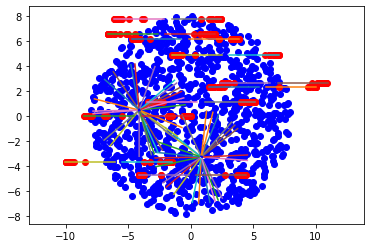

In [5]:
plt.figure()
scatter_couple(fr["kinesin5"])
scatter_couple(fr["motor"],color="red")
plot_fibers(fr["microtubule"])
plt.show()